In [ ]:
# Employees Resignation GUIDED PROJECT: Clean and Analyze Employee Exit Surveys

In this Guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
The TAFE exit survey supposedly can be found [here](https://data.gov.au/error?errorCode=404&recordType=Dataset&recordId=%22ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e%22); but it appears that the dataset has been removed.
Therefore, I would rely on the available copy from this notbook.
The exit survey dataset for the DETE can be found from [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).
This DETE dataset was created on 25/03/2014. Therefore the survey period must have been prior to that time.
The stakeholders would want us to answer the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 
They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

In [214]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')
dete_survey.info()
dete_survey.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [216]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [217]:
tafe_survey['CESSATION YEAR'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64

In [218]:
dete_survey['Cease Date']. value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
08/2012         2
07/2014         2
04/2014         2
02/2014         2
04/2013         2
07/2006         1
09/2010         1
11/2012         1
09/2014         1
2010            1
2014            1
07/2012         1
Name: Cease Date, dtype: int64

* At a quick glance we can see that in dete_survey, Cease Date happened a lot during 2012 and 2013. In tafe_survey a lot of resignations happened in 2011 and 2012.
* In dete_survey, we would explore 'SeparationType', 'Cease Date' and 'DETE Start Date' to get the idea behind reason for exit and longevity of the employment.
* In tafe_survey, we would explore 'Reason for ceasing employment', 'LengthofServiceOverall' again to get the same idea with the above question.


In [219]:
# Check the missing values

dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [220]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

* We updated dete_survey and tafe_survey by removing columns which are deemed irrelevant with the objective of this analysis.
* In dete_survey, we want to categorize the 'Not Stated' value as NaN to simplify our analysis.

In [221]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [222]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[ 28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [223]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [224]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [225]:
tafe_survey_updated= tafe_survey_updated.rename(columns={'Record ID':'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
tafe_survey_updated.columns=tafe_survey_updated.columns.str.lower()
tafe_survey_updated. head()

,id,institute,workarea,cease_date,separationtype,contributing factors. career move - public sector,contributing factors. career move - private sector,contributing factors. career move - self-employment,contributing factors. ill health,contributing factors. maternity/family,...,contributing factors. study,contributing factors. travel,contributing factors. other,contributing factors. none,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


* From the 2 datasets, we notice there are a lot of column names written differently but actually refer to the same meaning.
* Since we are going to eventually combine these 2 datasets we need to standardize the column names, e.g. Separation Type (in dete_survey) and Reason for ceasing employment (in tafe_survey) will be standardized to 'separationtype'.
* Also in tafe_survey, there are a lot of lengthy column names that we are going to shorten it out to make it simple.

In [226]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [227]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [228]:
dete_allkindofresign=dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations=dete_survey_updated.copy()
dete_resignations=dete_resignations[dete_allkindofresign]

In [229]:
print (dete_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


In [230]:
tafe_resignations=tafe_survey_updated.copy()[(tafe_survey_updated['separationtype']=='Resignation')]

* As we working on cleaning the data, we keep in mind the objective is to answer this question: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
* The column of 'separationtype' is very important. We need to separate the type of Resignation to know further reason for this separationtype.
* Therefore the two steps above will be selecting all the rows containing 'Resignation' in dete_survey_updated and tafe_survey_updated to pursue this objectives.

In [231]:
print (tafe_resignations['separationtype'].value_counts())

Resignation    340
Name: separationtype, dtype: int64


* Let us now focus on the date between cease_date and dete_start_date. The cease_date is the last year of the person's employment and dete_start_date is the person's first year of employment.
* Knowing that most people in this profession start working in their 20s, it's unlikely that the dete_start_date was before 1940.
Let's continue our data cleaning process.

In [232]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [233]:
# examine the same for dete_start_date
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

* The cease_date only happened in the millenium. We need to clean the values to calculate the length of employment together with the dete_start_date.
* We will use regular expression to extract the year and to convert the type to float.

In [234]:
pattern=r'(2[0-9]{3})'
dete_resignations['cease_year']= dete_resignations['cease_date'].str.extract(pattern)
dete_resignations['cease_year']=dete_resignations['cease_year'].astype(float)
dete_resignations['cease_year'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_year, dtype: int64

In [235]:
# We will do the value counts for the dete_start_date
dete_resignations['dete_start_date'].value_counts(). sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [236]:
# We do the same for tafe_resignations except it doesn't need reggular expression.
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

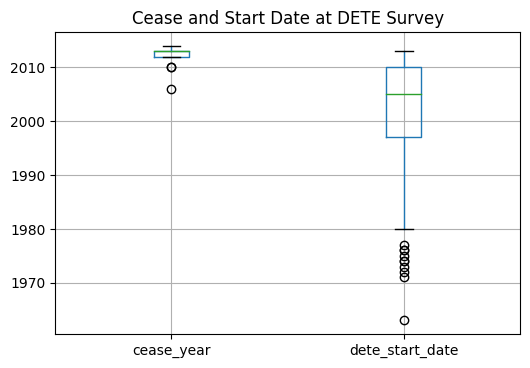

In [237]:
dete_resignations.boxplot(column=['cease_year','dete_start_date'])
plt.title('Cease and Start Date at DETE Survey')    
plt.show()                          
                                  

* As we know, Boxplot contains 5 values: the minimum, the maximum, the sample median, and the first and third quartiles.
* A boxplot is constructed of two parts, a box and a set of whiskers (vertical line with upper and lower line limit) shown above. Detail explanation about Boxplot can be found [here](https://en.wikipedia.org/wiki/Box_plot).
* The lowest point is the minimum of the dataset and the highest point is the maximum of the dataset.
* All small circles/dots beyong the minimum and maximum are considered outliers.
* The dete_start_date shows the earliest 1980 and the latest is 2013 (This Survey was conducted in 2014); The median year is around 2005.
* When we observe the cease_date, the same population show the earlier time of resignation is on 2012 (2010 being part of the outliers) and the latest was 2013.
* So the bulk of resignation was happening during 2012 and 2013. 

## Institute Service
In the world of Human Resources, the length of time an employee spent (tenure) in a workplace is referred to as their years of service.
In tafe_resignations dataframe there is already a 'service' column which we renamed to institute_service.
As we are going to eventually analyze both surveys togetherm we need to create a corresponding institute_service column in dete_resignations.

In [238]:
dete_resignations['cease_year'] = pd.to_datetime(dete_resignations['cease_year'])
dete_resignations['dete_start_date']= pd.to_datetime(dete_resignations['dete_start_date'])
dete_resignations['institute_service']=pd.DatetimeIndex(dete_resignations['cease_date']).year -pd.DatetimeIndex(dete_resignations['dete_start_date']).year

So, we have now a new column 'institute_service' in dete_resignations containing the length of service of the departing employees.
The same column 'institure_service'has already existed in tafe_resignations. 
Next we will identify any employees who resigned because they were dissatisfied.

## Identifying Dissatisfied Employee
In tafe_resignations the columns related with these aspects are: 
* Contributing Factors. Dissatisfaction 
* Contributing Factors. Job Dissatisfaction
    
In dete_resignations:
* job-dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment # this item might not be too significant, so we will omit
* lack_of_recognition
* lack_of_job_security 
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, we will mark them 'dissatisfied' in a new column.
First, let's update Contributing Factors. Dissatisfaction and Contributing Factors. Job Dissatisfaction in the TAFE dataset to True, False or NaN values.

We won't need to do this for the DETE dataset as they are already in this format.
    

In [239]:
def update_values(data):
    if pd.isnull(data):
        return np.nan
    elif data == '-':  # we interpret '-' as false
        return False
    return True

# update the columns to either be True, False or NaN

tafe_resignations[['contributing factors. dissatisfaction', 'contributing factors. job dissatisfaction']]=tafe_resignations[['contributing factors. dissatisfaction', 'contributing factors. job dissatisfaction']].applymap(update_values)
# add 'dissatisfied' column in dete and tafe.

dete_resignations['dissatisfied']= dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'lack_of_recognition', 'lack_of_job_security', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1)
tafe_resignations['dissatisfied']=tafe_resignations[['contributing factors. dissatisfaction', 'contributing factors. job dissatisfaction']].any(axis=1)

# let's see how many values of True, False and NaN in tafe_resignations

tafe_resignations['dissatisfied'].value_counts()


False    249
True      91
Name: dissatisfied, dtype: int64

In [240]:
dete_resignations['dissatisfied'].value_counts()

False    171
True     140
Name: dissatisfied, dtype: int64

In [241]:
# avoiding the 'SettingWithCopy' Warning, we need to create a copy.
dete_resignations_up= dete_resignations.copy()

In [242]:
tafe_resignations_up=tafe_resignations.copy()

In summary, we have created 'dissatisfied' columns for both dete_resignations as well as tafe_resignations.
Created a new 'institute_service' column for dete_resignations whilst the tafe_resignations have already got it.
We cleaned the contributing factors column in tafe-resignations.
Now we are ready to combine both datasets to aggregate the data according to the 'institute_service' column.

In [243]:
# create an identifier column for the two surveys:
dete_resignations['institute']= 'DETE'
tafe_resignations['institute']= 'TAFE'

combined_resignations= pd.concat([dete_resignations_up, tafe_resignations_up])
combined_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   id                                                   651 non-null    float64       
 1   separationtype                                       651 non-null    object        
 2   cease_date                                           635 non-null    object        
 3   dete_start_date                                      283 non-null    datetime64[ns]
 4   role_start_date                                      271 non-null    float64       
 5   position                                             598 non-null    object        
 6   classification                                       161 non-null    object        
 7   region                                               265 non-null    object        
 8   

In [244]:
# let's take a look how the combined datasets look like.
combined_resignations.head() 


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,contributing factors. ill health,contributing factors. maternity/family,contributing factors. dissatisfaction,contributing factors. job dissatisfaction,contributing factors. interpersonal conflict,contributing factors. study,contributing factors. travel,contributing factors. other,contributing factors. none,role_service
3,4.0,Resignation-Other reasons,05/2012,1970-01-01 00:00:00.000002005,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,05/2012,1970-01-01 00:00:00.000001994,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,07/2012,1970-01-01 00:00:00.000002009,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012,1970-01-01 00:00:00.000001997,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation-Move overseas/interstate,2012,1970-01-01 00:00:00.000002009,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As can be seen, combining 2 datasets and we still have some columns left in the dataframe that we don't use
for our analysis. That leave us with a lot of NaN values that we don't need.
So we will get rid of them by setting a threshold that any columns with less than 500 non-null values will be dropped.


In [245]:
combined_updated=combined_resignations.dropna(thresh=500, axis=1)
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied
3,4.0,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,42,False
5,6.0,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,42,True
8,9.0,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,42,False
9,10.0,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,42,True
11,12.0,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,42,False


By setting the threshold limit of 500 non-null value, we basically eliminate the contributing factors columns outside the consolidated 'dissatisfied' column.
We are now almost ready to perform some kind of analysis. Firstly,we need to clean up the 'institute_service' column.

In [246]:
combined_updated['institute_service'].value_counts()

43.0                  133
42.0                  115
Less than 1 year       73
1-2                    64
3-4                    63
5-6                    33
11-20                  26
44.0                   22
7-10                   21
More than 20 years     10
40.0                    2
36.0                    1
Name: institute_service, dtype: int64

To analyze the data, we'll convert the above numbers into categories. Taking [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes argument
that understanding employee's needs according to their career stage rather than just age is more effective.
We'll use the slightly modified definitions below:
* 'New': Less than 3 years at a company
* 'Experienced': 3-6 years at a company
* 'Established': 7-10 years at a company
* 'Veteran': 11 or more years at a company
Let's categorize the values in the 'institue_service' column based on the above definitions.

In looking at the way number of years were written, we need to do some cleaning. To do that we will pick-up the number before '.0'
and pick the numbers after '-'. With this format, the year written as 44.0 will be taken as 44 and the year written as 11-20 would count as 20 which belong to 
the category of Veteran (just happened 11 is also Veteran), and 7-10 would be taken as 10 (7 or 10 also belong to the same category).

In [247]:
# avoiding the 'SettingWithCopy' Warning, we need to create a copy.
combined_updated= combined_updated.copy()
combined_updated['institute_service']=combined_updated['institute_service'].astype(str). str.extract(r'(?<!\.)\b(\d+)\b(?!-)').astype(float)

In [248]:
# create a function to map the category as we defined above

def map_category(data):
    if pd.isnull(data):
        return np.nan
    elif data<3:
        return 'New'
    elif data<7:
        return 'Experienced'
    elif data<11:
        return 'Established'
    return 'Veteran'

combined_updated['service_cat']=combined_updated['institute_service'].apply(map_category)
    
# now we are ready to perform several analysis based on this new column.

In [249]:
# check the value of 'service_cat' column

combined_updated['service_cat'].value_counts(dropna=False)

Veteran        309
New            137
Experienced     96
NaN             88
Established     21
Name: service_cat, dtype: int64

In [250]:
# first, let's check the 'dissatisfied' column

combined_updated['dissatisfied'].value_counts(dropna=False)

False    420
True     231
Name: dissatisfied, dtype: int64

In [251]:
# replace the missing value in the 'dissatisfied'column with False because this most frequently occurs
combined_updated['dissatisfied']= combined_updated['dissatisfied'].fillna(value= False)


# Calculate the percentage of dissatisfied employees in each of service_cat group



In [252]:
ax= combined_updated.pivot_table( index= 'service_cat', values='dissatisfied')
%matplotlib inline

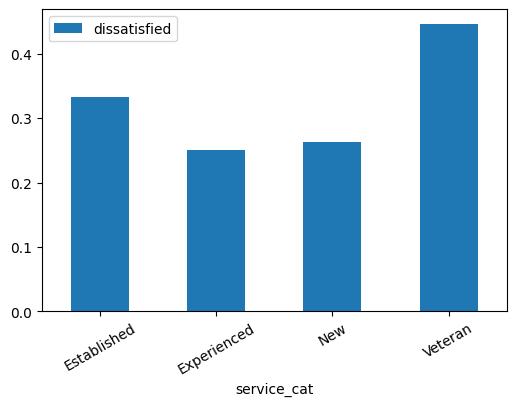

In [253]:
ax.plot(kind='bar', rot=30)

* From the chart above we can see that the 'Experienced' and the 'New'employees are less dissatisfaction than the 'Established'and the 'Veteran'.
* There are countless reasons for dissatisfaction and it's beyond the scope of our analysis.
* Now we are going to look up the 'employment_status' column whether there is any insteresting findings.

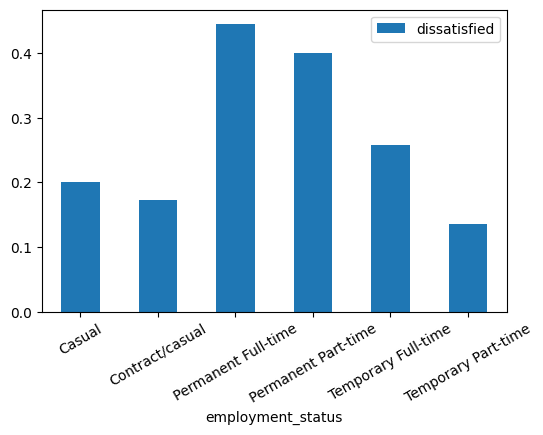

In [254]:
ax1= combined_updated.pivot_table(index='employment_status', values='dissatisfied')
ax1.plot(kind='bar', rot=30)

* Notice that the 'Permanent Full-time' and 'Permanent Part-time' are the groups that show dissatisfaction. 
* This is rather counter-intuitive as initially we might have thought that being permanent employess would give some kind of
employement certainty and yet from this finding we observe that they are the one that exit the organization feeling dissatisfied.
* We are now going to analyze 'age' group in order to answer:'Are younger employees resigning due to some kind of dissatisfaction? What about older employees?'.

In [255]:
# firstly, let's look at the 'age' column is we need to do data cleaning.

combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The 'age' range was written inconsistently. The range between 41  45 for example coul be written 41-45. Then we can combine '56 or older' together with '56-60' and '61 or older' and call them '56 or older'.

In [256]:
combined_updated['age']= combined_updated['age'].str.replace('  ', '-'). str.replace('56-60', '56 or older').str.replace('61 or older', '56 or older')
combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
NaN              55
Name: age, dtype: int64

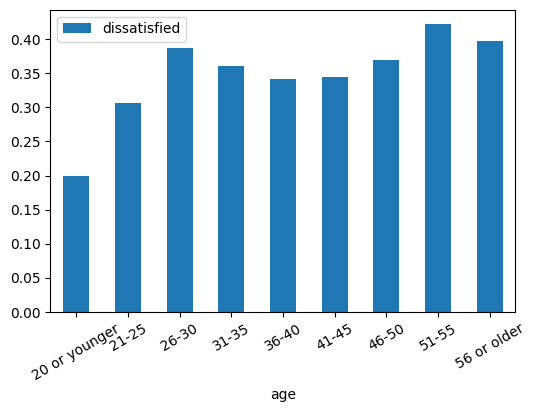

In [257]:
ax2=combined_updated.pivot_table(values='dissatisfied', index= 'age')
ax2.plot(kind='bar', rot=30)

* We can see noticeable difference on age group '26-30' and then age group above 51 years old. 
* These two groups resign with greater dissatisfaction then the rest of age groups.

## Conclusions

In answering the questions about: 1) Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction? What about the employees with longer service period.
    2) Are younger employees resigning due to some kind of dissatisfaction ? What about older employees?
    
Through various steps of data cleaning, data wrangling and data analysis we found out that:
* From the 2 datasets originated from DETE and TAFE, the number of resignations predominantly happened during the year of 2012 and 2013.
* Established and Veteran employees are resigning the organization with greater sense of dissatisfaction as compared to New or Experienced employees
* Employees with permanent positions exit the organization with more dissatisfaction than non permanent or casual employees
* The age group of 26-30 and above 51 years old tend to resign from the organization with more dissatisfied than the other age groups.

